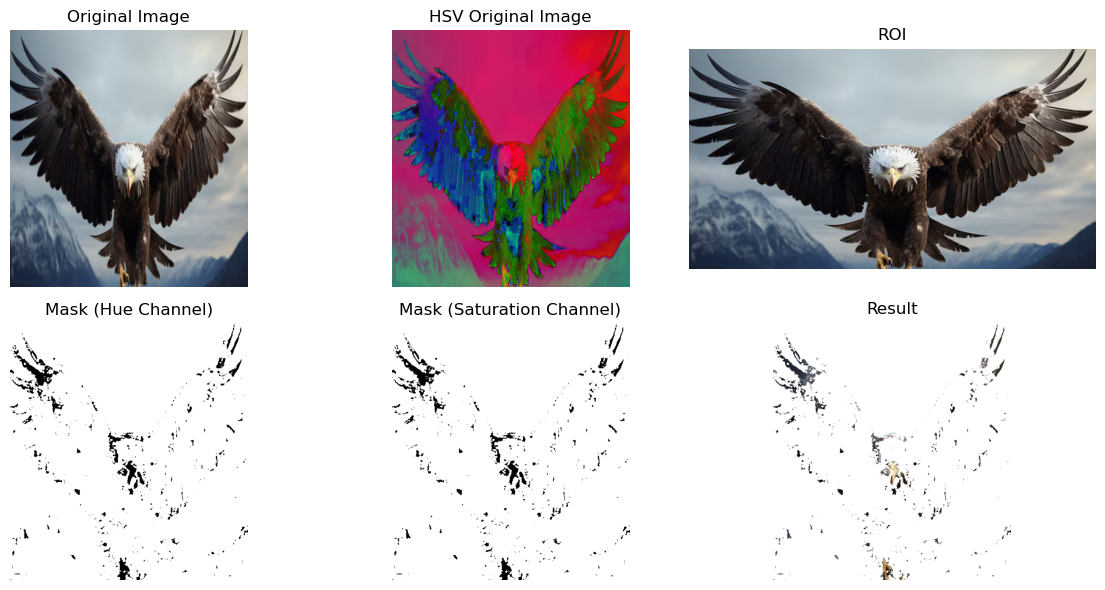

' This is a technique used in computer vision to identify areas of an image that have a similar color distribution to a specified region of interest (ROI).\nThis method is particularly useful for object tracking and image segmentation where the object’s color is known and distinct. The final result will highlight\nthe regions in the original image that have a similar color distribution to the ROI.'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
original_image = cv2.resize(original_image, (600, 650))
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Load the region of interest (ROI)
roi = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate histogram for the ROI
roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Create a mask using back projection
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

# Apply filtering to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 200, 255, cv2.THRESH_BINARY)

# Create a color mask
mask = cv2.merge((mask, mask, mask))

# Combine the mask with the original image
result = cv2.bitwise_or(original_image, mask)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(232)
plt.imshow(cv2.cvtColor(hsv_original, cv2.COLOR_BGR2RGB))
plt.title("HSV Original Image")
plt.axis("off")

plt.subplot(233)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("ROI")
plt.axis("off")

plt.subplot(234)
plt.imshow(mask[:, :, 0], cmap="gray")
plt.title("Mask (Hue Channel)")
plt.axis("off")

plt.subplot(235)
plt.imshow(mask[:, :, 1], cmap="gray")
plt.title("Mask (Saturation Channel)")
plt.axis("off")

plt.subplot(236)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")

plt.tight_layout()
plt.show()
""" This is a technique used in computer vision to identify areas of an image that have a similar color distribution to a specified region of interest (ROI).
This method is particularly useful for object tracking and image segmentation where the object’s color is known and distinct. The final result will highlight
the regions in the original image that have a similar color distribution to the ROI."""

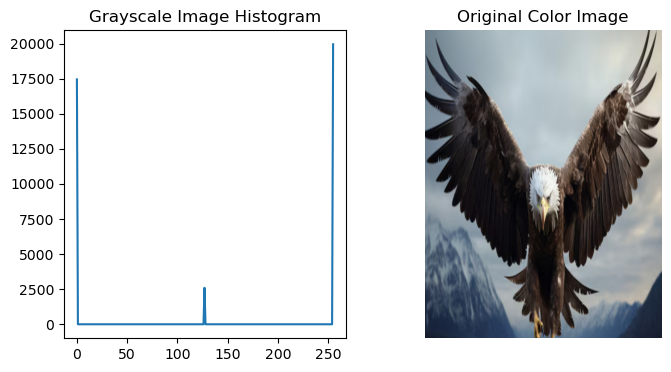

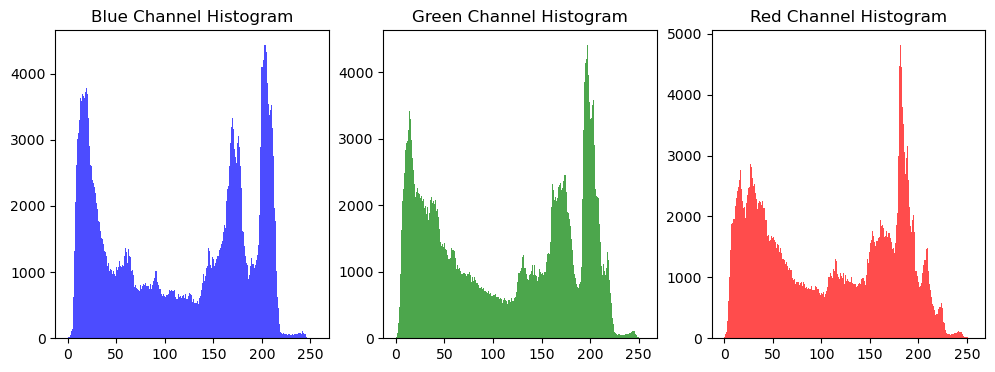

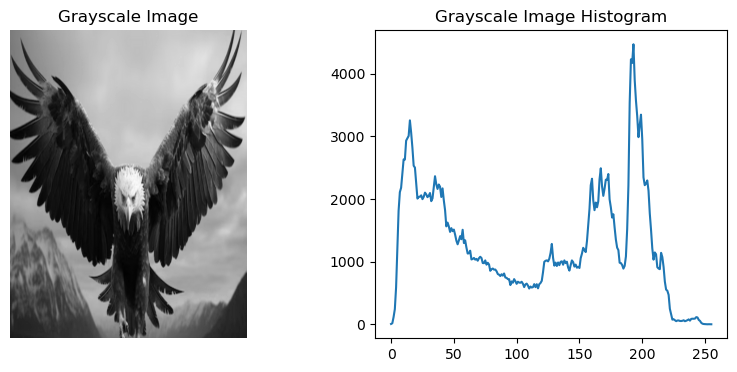

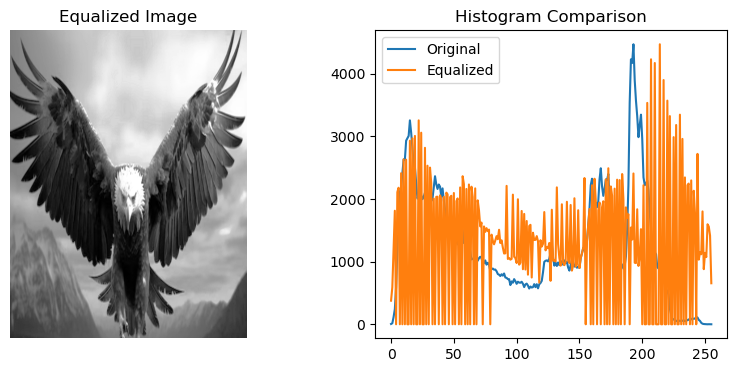

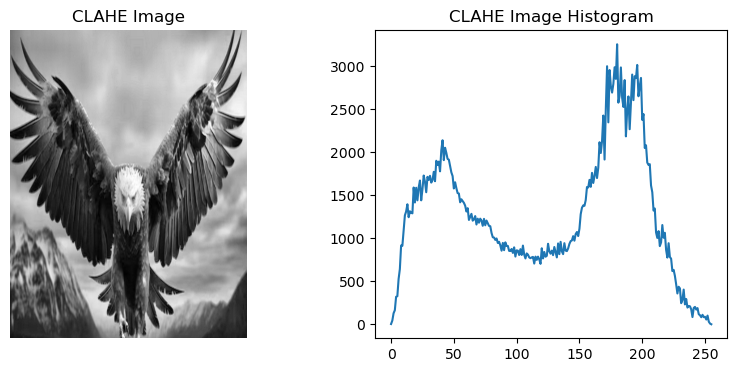

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a grayscale image with two white rectangles
img = np.zeros((200, 200), np.uint8)
cv2.rectangle(img, (0, 100), (200, 200), (255), -1)
cv2.rectangle(img, (0, 50), (50, 100), (127), -1)

# Calculate histogram of the grayscale image
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(hist)
plt.title("Grayscale Image Histogram")

# Load a color image
img_color = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
img_color = cv2.resize(img_color, (500, 650))

# Split the image into BGR channels
b, g, r = cv2.split(img_color)

# Display the original color image and each channel
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis("off")

plt.show()

# Plot histograms for each channel
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(b.ravel(), 256, [0, 256], color="blue", alpha=0.7)
plt.title("Blue Channel Histogram")

plt.subplot(132)
plt.hist(g.ravel(), 256, [0, 256], color="green", alpha=0.7)
plt.title("Green Channel Histogram")

plt.subplot(133)
plt.hist(r.ravel(), 256, [0, 256], color="red", alpha=0.7)
plt.title("Red Channel Histogram")

plt.show()

# Convert the color image to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Calculate histogram of the grayscale image
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Plot the grayscale image and its histogram
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(122)
plt.plot(hist_gray)
plt.title("Grayscale Image Histogram")

plt.show()

# Apply histogram equalization to the grayscale image
equ = cv2.equalizeHist(img_gray)

# Plot the equalized image and its histogram
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(equ, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(122)
plt.plot(hist_gray, label="Original")
plt.plot(cv2.calcHist([equ], [0], None, [256], [0, 256]), label="Equalized")
plt.title("Histogram Comparison")
plt.legend()

plt.show()

# Apply CLAHE to the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img_gray)

# Plot the CLAHE-enhanced image and its histogram
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(cl1, cmap="gray")
plt.title("CLAHE Image")
plt.axis("off")

plt.subplot(122)
plt.plot(cv2.calcHist([cl1], [0], None, [256], [0, 256]))
plt.title("CLAHE Image Histogram")

plt.show()
